
# Setup

## Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from  tqdm import  tqdm
from scipy.special import binom
import itertools
import helpers as hp
import simulations as sims
import importlib
importlib.reload(sims)

plt.style.use('ggplot')

FIG_PATH = "./../../figures/"

## Load processed data

In [19]:
data= pd.read_csv('./../../experimental_data/processed_data/single_cell_data.csv')
data_avg = pd.read_csv('./../../experimental_data/processed_data/avg_data.csv')
data_avg_one_cell = pd.read_csv('./../../experimental_data/processed_data/avg_data_one_cell.csv')
fits = pd.read_csv('./output/fits_summary.csv')
fits['p'] = fits.beta_population.values/(2*fits.alpha_population.values)
experiments = data.experiment.unique()
experiments

array(['NR-SpCas9', 'CTG-Cpf1', 'CGG-Cpf1', 'NoGuideRNA',
       'GAA-SpCas9-comb', 'GAA - Cpf1', 'CTG-SpCas9-comb', 'CGG-SpCas9',
       'NR-Cpf1-comb'], dtype=object)

In [21]:
def get_lags(df):
    df2 = df[df.initial_cells==1]
    df2 = df2[df2.bf>1]
    return np.array([np.min(df2[df2.well==well].time) for well in df2.well.unique()])

In [16]:
data_one_cell = data[data.initial_cells==1]

NR-SpCas9 		lag =  89213.49577073602
CTG-Cpf1 		lag =  81341.75017242077
CGG-Cpf1 		lag =  59325.17006802721
NoGuideRNA 		lag =  21531.51010701546
GAA-SpCas9-comb 		lag =  76689.72400756142
GAA - Cpf1 		lag =  91532.43944636678
CTG-SpCas9-comb 		lag =  54848.97959183673
CGG-SpCas9 		lag =  88661.62109375
NR-Cpf1-comb 		lag =  79933.26630278656


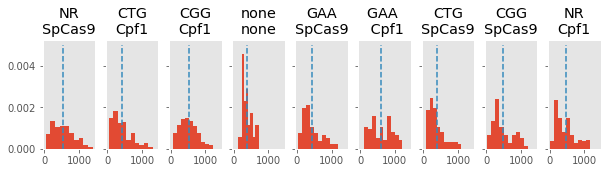

In [46]:
fig,axs = plt.subplots(ncols = len(experiments),figsize=(10,2),sharex=True,sharey="row")
k = 0
for exp in experiments:
    ax = axs[k]
    
    ax.set_title(data_avg[data_avg.experiment== exp].defect.values[0]\
                     +'\n'+data_avg[data_avg.experiment== exp].nuclease.values[0])
    lags = get_lags(data[data.experiment==exp])
    ax.hist(lags,10,density=True);
    ax.vlines([np.mean(lags)],[0],[0.005],'C1',linestyle='--')
    ax.grid(False)
    print(exp,"\t\tlag = ",np.var(lags))
    k+=1

40